In [27]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

In [4]:

df = pd.read_csv("../data/extracted_data.csv")
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
0,22,1514614,156908,5855,35313,1958,1
1,20,2381688,146739,2794,16549,566,1
2,24,2038853,353787,2628,40221,4918,1
3,10,496771,23251,1856,7647,5088,1
4,26,1123889,45802,964,2196,4004,1


In [3]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
count,245987.000000,2.459870e+05,2.459870e+05,245987.000000,2.459870e+05,245987.000000,245987.000000
mean,18.727221,2.656137e+06,1.311227e+05,1239.411209,1.037797e+04,3157.225866,4.072138
std,6.779700,8.340805e+06,4.433037e+05,8404.223869,7.532480e+04,1744.362827,2.454605
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.000000,0.000000
25%,17.000000,4.729600e+05,1.804900e+04,0.000000,1.293000e+03,1792.000000,2.000000
50%,20.000000,9.424540e+05,4.079600e+04,0.000000,2.801000e+03,3060.000000,4.000000
75%,24.000000,2.117553e+06,1.005080e+05,567.000000,6.519000e+03,4507.000000,5.000000
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06,19332.000000,37.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245987 entries, 0 to 245986
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   categoryId     245987 non-null  int64
 1   view_count     245987 non-null  int64
 2   likes          245987 non-null  int64
 3   dislikes       245987 non-null  int64
 4   comment_count  245987 non-null  int64
 5   channel_age    245987 non-null  int64
 6   days_uploaded  245987 non-null  int64
dtypes: int64(7)
memory usage: 13.1 MB


In [5]:
df.nunique()

categoryId           15
view_count       234651
likes            130808
dislikes          13179
comment_count     34423
channel_age        6754
days_uploaded        38
dtype: int64

In [44]:
df[df['view_count'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 15289 to 201188
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   categoryId     76 non-null     int64
 1   view_count     76 non-null     int64
 2   likes          76 non-null     int64
 3   dislikes       76 non-null     int64
 4   comment_count  76 non-null     int64
 5   channel_age    76 non-null     int64
 6   days_uploaded  76 non-null     int64
dtypes: int64(7)
memory usage: 4.8 KB


#### 76 redova kojima nedostaje vrednost za view_count

In [47]:
df[df['likes'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 1224 to 244967
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   categoryId     1466 non-null   int64
 1   view_count     1466 non-null   int64
 2   likes          1466 non-null   int64
 3   dislikes       1466 non-null   int64
 4   comment_count  1466 non-null   int64
 5   channel_age    1466 non-null   int64
 6   days_uploaded  1466 non-null   int64
dtypes: int64(7)
memory usage: 91.6 KB


#### 1446 redova kojima nedostaje vrednost za likes

In [48]:
df[df['dislikes'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147916 entries, 1224 to 245986
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   categoryId     147916 non-null  int64
 1   view_count     147916 non-null  int64
 2   likes          147916 non-null  int64
 3   dislikes       147916 non-null  int64
 4   comment_count  147916 non-null  int64
 5   channel_age    147916 non-null  int64
 6   days_uploaded  147916 non-null  int64
dtypes: int64(7)
memory usage: 9.0 MB


#### 147916 redova kojima nedostaje vrednost za dislikes

In [51]:
df[df['channel_age'] == -1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 183 to 200578
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   categoryId     636 non-null    int64
 1   view_count     636 non-null    int64
 2   likes          636 non-null    int64
 3   dislikes       636 non-null    int64
 4   comment_count  636 non-null    int64
 5   channel_age    636 non-null    int64
 6   days_uploaded  636 non-null    int64
dtypes: int64(7)
memory usage: 39.8 KB


#### 636 redova kojima nedostaje vrednost za channel_age

In [6]:
df1 = df.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245904 entries, 0 to 245986
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   categoryId     245904 non-null  int64
 1   view_count     245904 non-null  int64
 2   likes          245904 non-null  int64
 3   dislikes       245904 non-null  int64
 4   comment_count  245904 non-null  int64
 5   channel_age    245904 non-null  int64
 6   days_uploaded  245904 non-null  int64
dtypes: int64(7)
memory usage: 15.0 MB


#### Skup podatak sadrzi 83 duplikat vrednosti.

In [31]:
numeric_features = ['view_count', 'dislikes', 'comment_count', 'channel_age', 'days_uploaded']
categorical_features = ['categoryId']
target = "likes"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['view_count', 'dislikes', 'comment_count', 'channel_age', 'days_uploaded']

categorical_features:
['categoryId']

target:
likes


In [32]:
for i in categorical_features:
    print(f'{i}\n{np.round((df[i].value_counts() / df[i].value_counts().sum()) * 100,2)}')

categoryId
24    19.99
20    19.88
10    16.39
17    11.57
22     8.44
23     4.98
1      4.04
25     3.54
28     3.02
26     2.60
27     2.46
2      1.99
19     0.60
15     0.45
29     0.05
Name: categoryId, dtype: float64


#### Najcesce se pojavljuju video snimci sa kategorijama 24, 20 i 10, sto predstavlja kategorija Entertainment, Gaming i Music u tom redosledu.

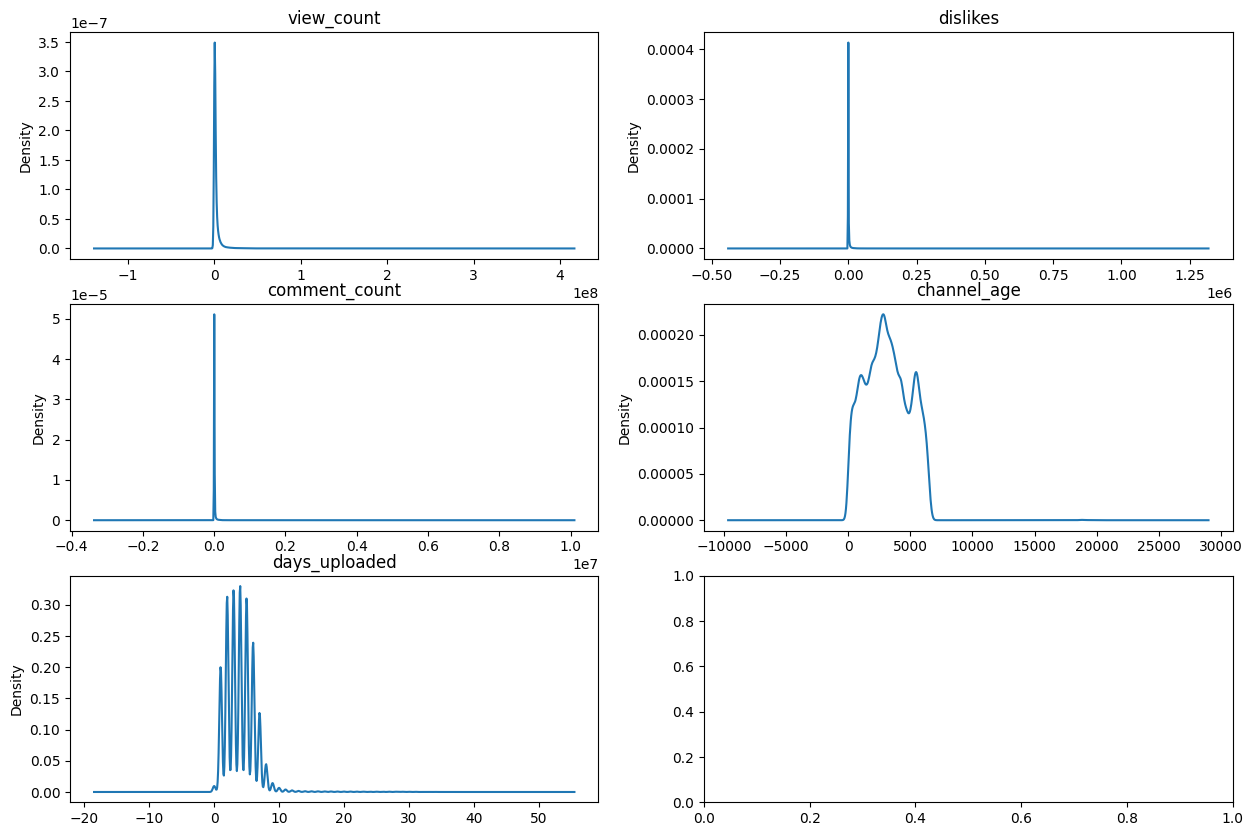

In [34]:
fig,ax = plt.subplots(3,2,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

In [35]:
for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')

view_count: Not Gaussian  NormaltestResult(statistic=426119.0338390607, pvalue=0.0)
dislikes: Not Gaussian  NormaltestResult(statistic=762464.6591132695, pvalue=0.0)
comment_count: Not Gaussian  NormaltestResult(statistic=719794.7124648655, pvalue=0.0)
channel_age: Not Gaussian  NormaltestResult(statistic=4763.42864819269, pvalue=0.0)
days_uploaded: Not Gaussian  NormaltestResult(statistic=178115.8107108625, pvalue=0.0)


In [37]:
for i in numeric_features:
    print(f'{i}: {np.abs(np.round((df[i].std()/df[i].median()) * 100,2))}')

view_count: 885.01
dislikes: inf
comment_count: 2689.21
channel_age: 57.01
days_uploaded: 61.37


C:\Users\filip\AppData\Local\Temp\ipykernel_17052\1784928176.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  print(f'{i}: {np.abs(np.round((df[i].std()/df[i].median()) * 100,2))}')


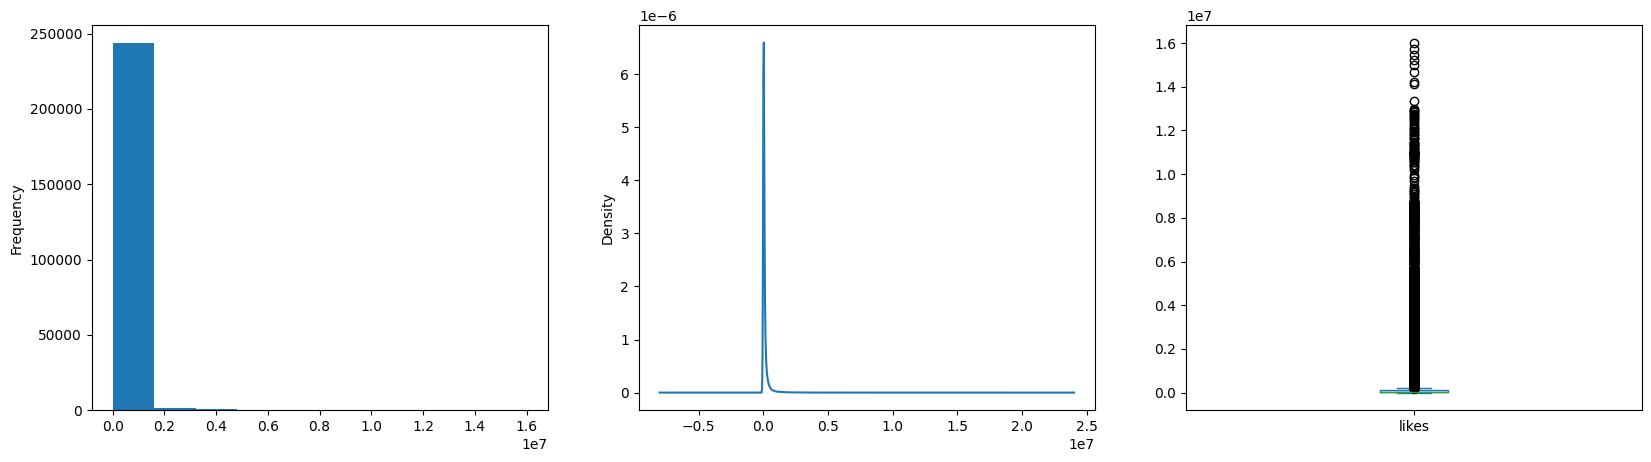

In [38]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
df['likes'].plot(kind="hist",ax=ax[0])
df['likes'].plot(kind="kde",ax=ax[1])
df['likes'].plot(kind="box",ax=ax[2])
plt.show()

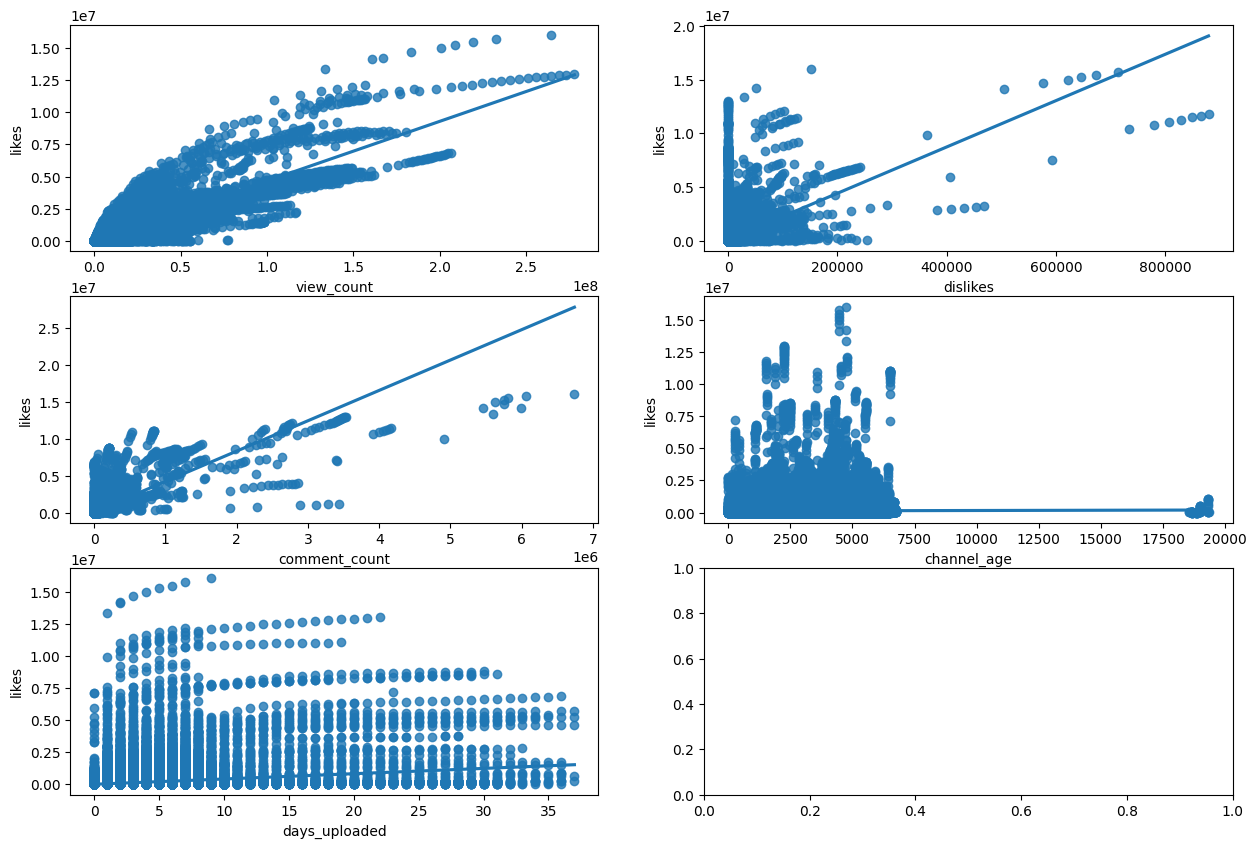

In [39]:
fig,ax = plt.subplots(3,2,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sb.regplot(x=i,y="likes",data=df,ax=ax[row,col],ci=False)
    col += 1

<Axes: xlabel='categoryId', ylabel='likes'>

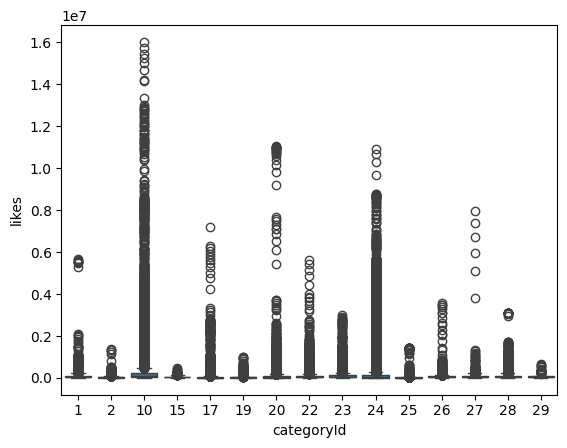

In [40]:
sb.boxplot(x=df[categorical_features[0]],y=df[target])

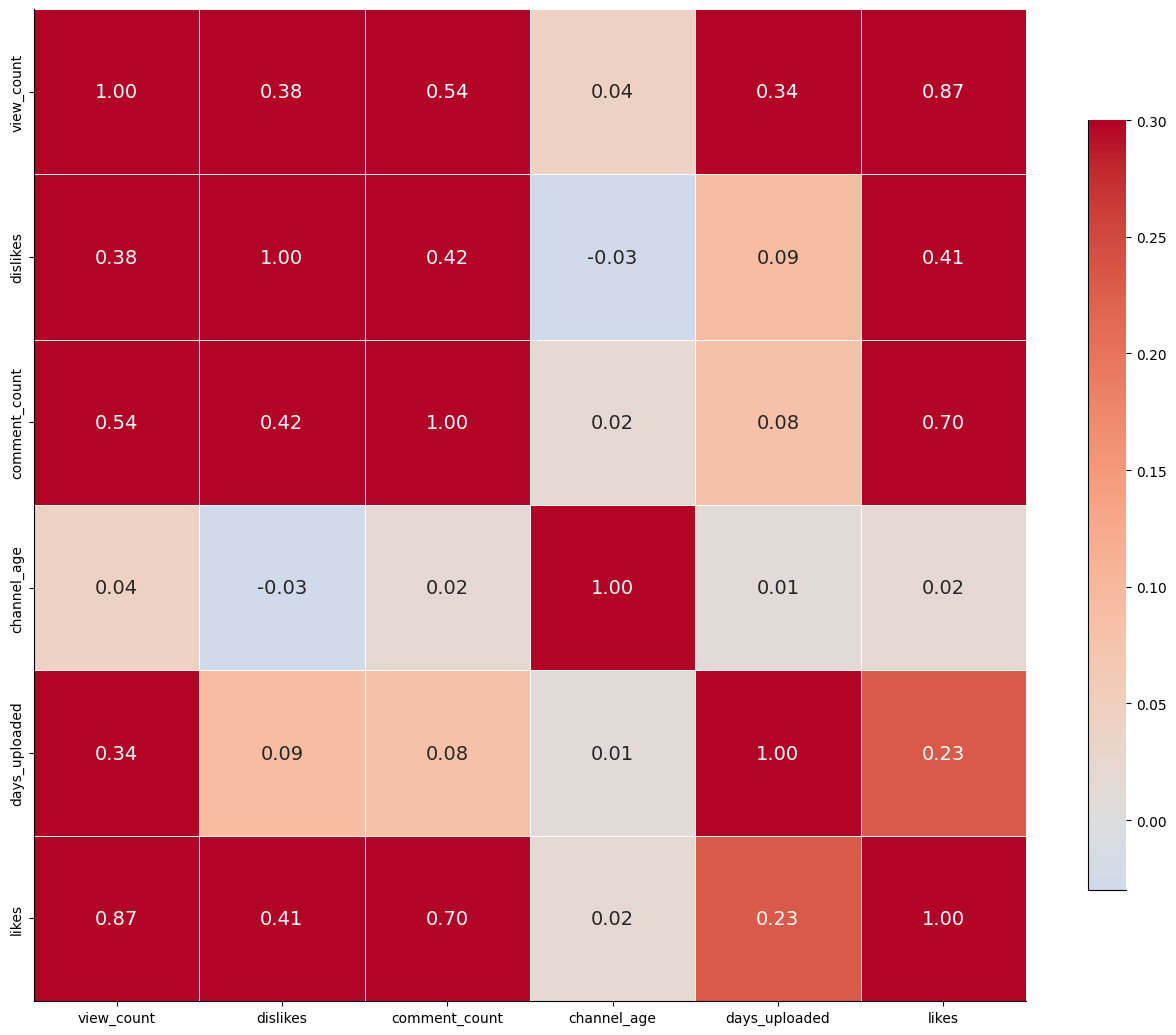

In [41]:
num_columns = numeric_features.copy() 
num_columns.append('likes')

corr = df[num_columns].corr().round(2)

plt.figure(figsize=(16, 20))
g = sb.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"fontsize":14})
sb.despine()

plt.show()

#### Starost kanala channel_age je u slaboj korelaciji sa brojem lajkova koje video ima